In [1]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout,Input,Flatten,Dense,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
batchsize=40

In [3]:
train_datagen= ImageDataGenerator(rescale=1./255,rotation_range=0.2,shear_range=0.2,
     zoom_range=0.2,width_shift_range=0.2,
    height_shift_range=0.2,validation_split=0.2)

In [4]:
train_data= train_datagen.flow_from_directory(r'D:\mrlEyes_dataset\prepared data\train',target_size=(80,80),batch_size=batchsize,class_mode='categorical',subset='training')
validation_data= train_datagen.flow_from_directory(r'D:\mrlEyes_dataset\prepared data\train',target_size=(80,80),batch_size=batchsize,class_mode='categorical',subset='validation')

Found 73544 images belonging to 2 classes.
Found 18385 images belonging to 2 classes.


In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(r'D:\mrlEyes_dataset\prepared data\test',target_size=(80,80),batch_size=batchsize,class_mode='categorical')



Found 4020 images belonging to 2 classes.


In [6]:
bmodel = InceptionV3(include_top=False, weights='imagenet',input_tensor=Input(shape=(80,80,3)))
hmodel = bmodel.output
hmodel = Flatten()(hmodel)
hmodel = Dense(64, activation = 'relu')(hmodel)
hmodel = Dropout(0.5)(hmodel)
hmodel = Dense(2, activation = 'softmax')(hmodel)

model = Model(inputs=bmodel.input,outputs=hmodel)
for layer in bmodel.layers:
    layer.trainable=False
    
    

In [7]:
#model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 80, 80, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 39, 39, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 39, 39, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 39, 39, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [7]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping, ReduceLROnPlateau

In [8]:
checkpoint = ModelCheckpoint(r'D:\mrlEyes_dataset\models\model.h5',
            monitor = 'val_loss',save_best_only=True,verbose=3)


earlystop = EarlyStopping(monitor = 'val_loss', patience = 7,verbose = 3, restore_best_weights = True)

learning_rate = ReduceLROnPlateau(monitor='val_loss', patience = 3, verbose=3, )

callbacks =  [checkpoint,earlystop,learning_rate]

In [9]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

history=model.fit_generator(train_data,steps_per_epoch=train_data.samples//batchsize,
                    validation_data=validation_data,
                   validation_steps=validation_data.samples//batchsize,
                    callbacks=callbacks,
                    epochs=20)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
1838/1838 [==============================] - ETA: 0s - loss: 0.2051 - accuracy: 0.9178
Epoch 00001: val_loss improved from inf to 0.15442, saving model to D:\mrlEyes_dataset\models\model.h5
1838/1838 [==============================] - 351s 191ms/step - loss: 0.2051 - accuracy: 0.9178 - val_loss: 0.1544 - val_accuracy: 0.9436
Epoch 2/20
1838/1838 [==============================] - ETA: 0s - loss: 0.1749 - accuracy: 0.9315
Epoch 00002: val_loss improved from 0.15442 to 0.15026, saving model to D:\mrlEyes_dataset\models\model.h5
1838/1838 [==============================] - 346s 188ms/step - loss: 0.1749 - accuracy: 0.9315 - val_loss: 0.1503 - val_accuracy: 0.9428
Epoch 3/20
1838/1838 [==============================] - ETA: 0s - loss: 0.1631 - accuracy: 0.9362
Epoch 00003: val_loss did not improve from 0.15026
1838/1838 [==============================] - 345s 188ms/step - loss: 0.1631 - accuracy: 0.9362 

In [26]:
acc_tr, loss_tr = model.evaluate_generator(train_data)
print(acc_tr)
print(loss_tr)

0.1276005059480667
0.9504514336585999


In [23]:
acc_vr, loss_vr = model.evaluate_generator(validation_data)
print(acc_vr)
print(loss_vr)


0.15174593031406403
0.9449007511138916


In [24]:
acc_test, loss_test = model.evaluate_generator(test_data)
print(acc_tr)
print(loss_tr)

0.12978795170783997
0.9495267868041992


In [13]:
history.history??

In [15]:
# pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


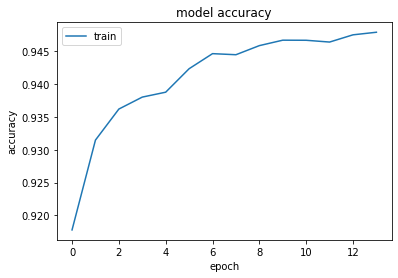

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc = 'upper left')
plt.show()

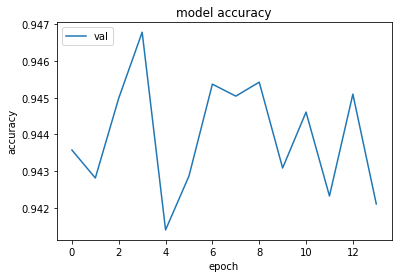

In [15]:
# plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['val'], loc = 'upper left')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

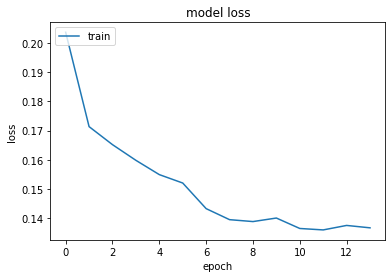

In [17]:
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc = 'upper left')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

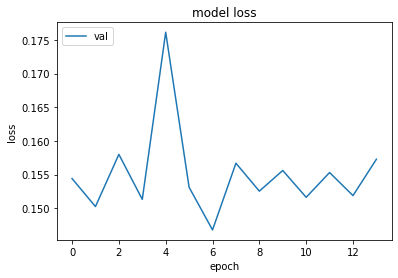

In [16]:

plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['val'], loc = 'upper left')
plt.show

In [17]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [31]:
#pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [31]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [32]:
import numpy as np

In [38]:
batch_size=40
Y_pred=model.predict_generator(train_data,90248//batch_size+1)
y_pred=np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm= confusion_matrix(train_data.classes,y_pred)
print(cm)
print('Classification Report')
print(classification_report(train_data.classes,y_pred))

Confusion Matrix
[[18711 17897]
 [18874 18062]]
Classification Report
              precision    recall  f1-score   support

           0       0.50      0.51      0.50     36608
           1       0.50      0.49      0.50     36936

    accuracy                           0.50     73544
   macro avg       0.50      0.50      0.50     73544
weighted avg       0.50      0.50      0.50     73544



In [50]:
import sklearn.metrics as metrics

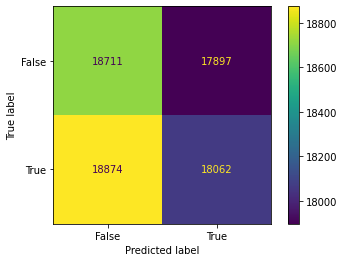

In [52]:
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[False,True])
cm_display.plot()
plt.show()

In [19]:
from sklearn.metrics import accuracy_score


In [20]:
y_pred = model.predict(train_data)

In [21]:
y_pred

array([[1.4552002e-01, 8.5448003e-01],
       [5.3142077e-01, 4.6857923e-01],
       [6.4619840e-06, 9.9999356e-01],
       ...,
       [6.0601205e-01, 3.9398789e-01],
       [9.9420434e-01, 5.7956534e-03],
       [2.0330424e-04, 9.9979669e-01]], dtype=float32)

In [22]:
pred =  model.predict(test_data)
pred

array([[5.7423446e-02, 9.4257653e-01],
       [5.9677339e-01, 4.0322664e-01],
       [9.9366993e-01, 6.3301492e-03],
       ...,
       [5.6335026e-01, 4.3664968e-01],
       [7.1669081e-07, 9.9999928e-01],
       [9.7679889e-01, 2.3201128e-02]], dtype=float32)